In [134]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import Series
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

from pipeline import Dataset

from pandas.plotting import lag_plot, autocorrelation_plot
import seaborn as sns

In [2]:
dataset = Dataset.load()

In [120]:
m_agg_df = dataset.market.groupby(by=['asset', 'day']).mean().reset_index()
full_df = pd.concat([m_agg_df.set_index(['asset', 'day'])[['close']], dataset.fundamental.set_index(['asset', 'day']),
                     dataset.ref_return.set_index(['asset', 'day'])], axis=1).dropna()  # dropna just for training

[(0.0, 10.0)]

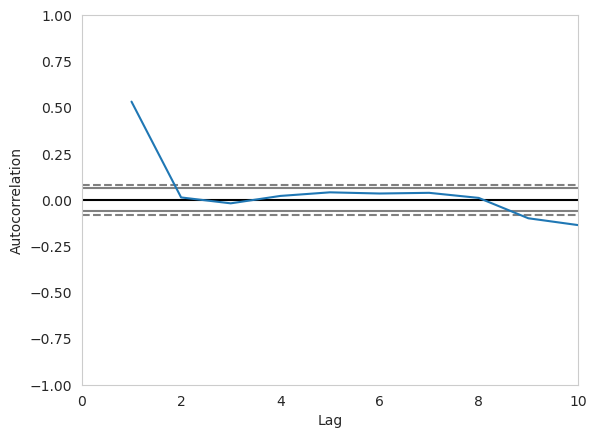

In [15]:
autocorrelation_plot(full_df.loc[full_df.index.get_level_values(0) == 2]['return'])
plt.gca().set(xlim=[0, 10])

In [88]:
def get_single_day_return(s):
    return (s.shift(-1) / s - 1).fillna(0)

In [89]:
rr = get_single_day_return(
    dataset.market.set_index('asset').loc[0].set_index('timeslot').loc[50].set_index('day')['close'])

In [90]:
rr

day
1      -0.032352
2       0.005658
3       0.023017
4       0.083000
5      -0.012928
          ...   
996     0.015952
997    -0.011772
998    -0.011920
999    -0.007038
1000    0.000000
Name: close, Length: 1000, dtype: float64

In [91]:
wdf = dataset.market.groupby(by='asset').apply(
    lambda df: get_single_day_return(df.set_index('timeslot').loc[50].set_index('day')['close']))

In [92]:
wdf

day,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
asset,,,,,,,,,,,,,,,,,,,,,
0,-0.032352,0.005658,0.023017,0.083000,-0.012928,-0.014497,-0.010444,0.018706,-0.002354,-0.010855,...,0.011575,-0.009534,-0.008667,-0.009702,-0.016671,0.015952,-0.011772,-0.011920,-0.007038,0.0
1,-0.060949,0.008813,0.064338,0.040302,0.007890,0.002844,-0.022710,0.023238,0.059617,0.010049,...,-0.019006,-0.012368,0.001255,0.021258,0.001224,0.027722,-0.017056,-0.031478,0.022917,0.0
2,-0.037638,0.036314,-0.005396,0.048784,-0.015498,-0.013125,0.011963,-0.003941,0.013195,-0.002607,...,0.004048,-0.022681,0.003607,0.011820,-0.018281,-0.012420,-0.000522,-0.002621,-0.003680,0.0
3,-0.029097,0.010899,0.057948,0.010191,-0.013870,-0.012790,0.003895,-0.024524,0.007944,-0.009190,...,0.000000,0.006936,0.000000,0.001373,0.004125,-0.009582,0.006917,-0.016488,-0.005581,0.0
4,-0.026376,0.007386,0.004895,0.048670,-0.011603,-0.014079,-0.019047,-0.031554,0.007516,-0.007460,...,0.021160,-0.027618,-0.012791,0.021586,-0.011267,0.038458,-0.010973,-0.030509,0.014297,0.0
5,0.014971,0.009320,-0.023848,0.047283,0.019564,0.000736,-0.017698,-0.010509,0.022759,-0.016318,...,0.007098,-0.022325,-0.001198,-0.001210,-0.003613,-0.001205,-0.027848,-0.012455,-0.003782,0.0
6,0.024999,-0.006104,0.009199,-0.024315,-0.006237,-0.043879,-0.006564,-0.042906,-0.003438,-0.027680,...,0.003195,-0.012792,0.000000,-0.009705,0.003285,-0.009768,0.026314,-0.009638,0.003253,0.0
7,0.006387,0.007938,0.032020,0.025432,-0.015378,0.003026,-0.014565,0.002545,0.039149,-0.005381,...,-0.005077,-0.015817,-0.005185,-0.002606,-0.003654,-0.009967,-0.014828,-0.010754,0.001630,0.0
8,-0.015514,0.003645,0.032606,0.017547,-0.017244,0.003507,-0.020981,-0.014280,0.008448,-0.004785,...,0.022997,-0.014983,0.000000,0.000000,0.000000,-0.012176,-0.012326,-0.004691,0.000000,0.0


In [94]:
hold_1_return = wdf.reset_index().melt(id_vars=['asset'], value_vars=wdf.columns,
                                       value_name='hold_1_return').sort_values(by=['asset', 'day']).reset_index(
    drop=True)

In [121]:
hold_1_return.head()

,asset,day,hold_1_return
0,0,1,-0.032352
1,0,2,0.005658
2,0,3,0.023017
3,0,4,0.083000
4,0,5,-0.012928


In [119]:
day_before_hold_1_return = hold_1_return.set_index(['asset', 'day']).groupby(level=0).shift(1, fill_value=0)

In [81]:
dataset.ref_return.sort_values(['asset', 'day'])

,asset,day,return
0,0,1,-0.026877
54,0,2,0.028805
108,0,3,0.107928
162,0,4,0.068998
216,0,5,-0.027238
...,...,...,...
53675,53,994,0.020942
53729,53,995,0.042851
53783,53,996,0.050002
53837,53,997,0.019924


In [122]:
full_df['hold_1_return'] = hold_1_return.set_index(['asset', 'day'])

In [123]:
full_df['day_before_hold_1_return'] = day_before_hold_1_return

KeyboardInterrupt: 

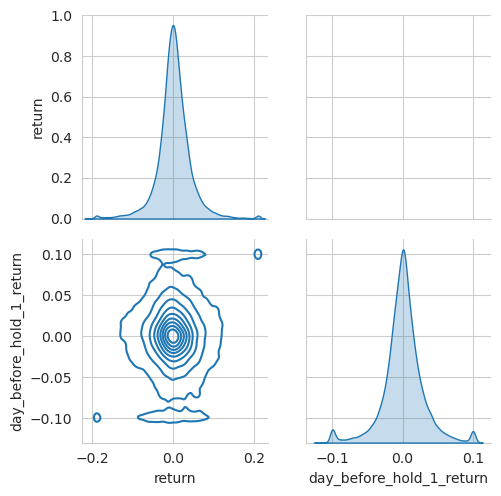

In [127]:
sns.pairplot(full_df[['return', 'day_before_hold_1_return']], kind='kde')

In [109]:
full_df.reset_index().groupby('asset')

,asset,day,close,turnoverRatio,transactionAmount,pe_ttm,pe,pb,ps,pcf,return,hold_1_return,day_before_hold_1_return
0,0,1,24.536720,3.6794,17229.0,34.4425,32.3029,4.9425,3.8180,-578.7700,-0.026877,-0.032352,NaN
1,0,2,23.938318,3.2535,18378.0,33.3198,31.2498,4.7814,3.6935,-559.9031,0.028805,0.005658,NaN
2,0,3,23.628554,2.4947,13686.0,23.3887,23.3887,4.3823,2.9722,-42.8676,0.107928,0.023017,NaN
3,0,4,23.847280,4.5625,22587.0,23.9187,23.9187,4.4816,3.0396,-43.8390,0.068998,0.083000,NaN
4,0,5,26.002992,18.2257,65239.0,25.9119,25.9119,4.8551,3.2929,-47.4923,-0.027238,-0.012928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53887,53,994,9.334846,0.6555,5554.0,9.9428,9.9428,1.8629,0.3802,125.5971,0.020942,0.007861,NaN
53888,53,995,9.349170,0.6154,6417.0,10.0148,10.0148,1.8764,0.3830,126.5072,0.042851,0.012978,NaN
53889,53,996,9.440208,0.8417,5204.0,10.1469,10.1469,1.9012,0.3880,128.1758,0.050002,0.029490,NaN
53890,53,997,9.816240,1.4411,9143.0,10.4471,10.4471,1.9574,0.3995,131.9680,0.019924,0.019924,NaN


In [129]:
full_df.swaplevel().sort_index()

close  turnoverRatio  transactionAmount    pe_ttm        pe  \
day asset                                                                    
1   0      24.536720         3.6794            17229.0   34.4425   32.3029   
    1      16.159082         2.5150             3706.0   28.9934   27.2726   
    2       9.051792         1.2858             5136.0   42.9352   41.9279   
    3       9.113946         2.2007             3280.0   15.2245   13.8032   
    4       5.053044         0.8627             5291.0 -369.9850 -433.1736   
...              ...            ...                ...       ...       ...   
998 49     13.931758         0.3720             5676.0   41.1121   41.1121   
    50     11.208480         0.4780             4506.0   19.4678   19.4678   
    51      3.749418         1.1501             5179.0   14.5922   14.5922   
    52     28.825080         0.5684             7558.0   28.9922   28.9922   
    53      9.827900         1.2933             9681.0   10.6513   10.6513   

               pb      ps       pcf    return  hold_1_return  \
day asset                                                      
1   0      4.9425  3.8180 -578.7700 -0.026877      -0.032352   
    1      5.0552  3.0484   23.8260 -0.052674      -0.060949   
    2      4.8083  4.1392  -58.2185 -0.002691      -0.037638   
    3      2.1904  0.6691   61.0491 -0.018515      -0.029097   
    4      3.0714  2.9370  -25.2279 -0.019184      -0.026376   
...           ...     ...       ...       ...            ...   
998 49     2.8312  1.0491   73.1850 -0.014799      -0.006962   
    50     2.5076  1.1590  -38.0915  0.012921       0.004310   
    51     1.4130  0.7009   19.5205 -0.052286      -0.026143   
    52     5.7855  3.7150 -582.4621 -0.015559      -0.019765   
    53     1.9956  0.4073  134.5467 -0.003662       0.000000   

           day_before_hold_1_return  
day asset                            
1   0                      0.000000  
    1                      0.000000  
    2                      0.000000  
    3                      0.000000  
    4                      0.000000  
...                             ...  
998 49                    -0.014577  
    50                    -0.013801  
    51                    -0.040754  
    52                     0.004224  
    53                     0.019924  

[53892 rows x 11 columns]

In [132]:
dataset.market.set_index('asset').loc[0].set_index('day').loc[1]

,timeslot,open,close,high,low,volume,money
day,,,,,,,
1,1,25.0164,24.9557,25.1378,24.9436,642243.0,1.610060e+07
1,2,24.9557,24.8465,24.9557,24.8101,797872.0,1.984058e+07
1,3,24.8465,24.7008,24.8586,24.6644,1234546.0,3.056567e+07
1,4,24.7008,24.7615,24.7858,24.7008,533023.0,1.318848e+07
1,5,24.7615,24.7251,24.7615,24.7008,565000.0,1.396949e+07
1,6,24.7372,24.7008,24.7372,24.7008,689067.0,1.703287e+07
1,7,24.7008,24.5673,24.7008,24.5673,1036662.0,2.554498e+07
1,8,24.5673,24.4945,24.5795,24.4823,1131244.0,2.776487e+07
1,9,24.4945,24.5552,24.5673,24.4945,461073.0,1.131183e+07


In [135]:
def extract_intraday(df):
    df = df.set_index('timeslot')

    return Series({
        'open': df.loc[1]['open'],
        'close_price': df.loc[50]['close'],
        'high_price': df['high'].max(),
        'low_price': df['low'].min(),
        'std': df['close'].std(),
        'mean': df['close'].mean(),
        'volume': df['volume'].sum(),
        'money': df['money'].sum(),
    })

In [139]:
sub = dataset.market.set_index('day').loc[:5].reset_index()
sub.groupby(['asset', 'day']).apply(extract_intraday)
# sub

open  close_price  high_price  low_price       std       mean  \
asset day                                                                     
0     1    25.0164      24.3852     25.1378    24.2396  0.121904  24.536720   
      2    24.4217      23.5963     24.5552    23.5234  0.317253  23.938318   
      3    23.5963      23.7298     23.7783    23.3899  0.073839  23.628554   
      4    23.6812      24.2760     24.3610    23.3778  0.335550  23.847280   
      5    24.3003      26.2909     26.7036    23.9847  0.634391  26.002992   
...            ...          ...         ...        ...       ...        ...   
53    1     8.8850       8.8001      8.9093     8.7515  0.029580   8.812922   
      2     8.7636       8.5209      8.8122     8.4602  0.077172   8.639582   
      3     8.5087       8.6058      8.6544     8.5087  0.035475   8.587400   
      4     8.6180       8.9336      8.9700     8.5816  0.084805   8.861716   
      5     8.8729       9.0792      9.1035     8.7636  0.052553   9.006628   

                volume         money  
asset day                             
0     1     22703792.0  5.574624e+08  
      2     20075851.0  4.800800e+08  
      3     15398462.0  3.637981e+08  
      4     28162025.0  6.723506e+08  
      5    112498597.0  2.939903e+09  
...                ...           ...  
53    1      6696751.0  5.896871e+07  
      2      9305418.0  8.021630e+07  
      3      4242748.0  3.644933e+07  
      4     12603841.0  1.118195e+08  
      5     14320435.0  1.290759e+08  

[270 rows x 8 columns]

In [149]:
import numpy as np

m_agg_df = pd.concat([
    sub.set_index('timeslot').loc[1].set_index(['asset', 'day'])['open'],
    sub.set_index('timeslot').loc[50].set_index(['asset', 'day'])['close'],
    sub.groupby(['asset', 'day']).agg(high=('high', max), low=('low', min), var=('close', np.std), avg=('close', np.mean), volume=('volume', np.sum), money=('money', np.sum)),
], axis=1)